# Code python traitement fichiers EXCEL ANR

Ce fichier est le notebook comprenant tous les codes pythons nécessaires pour le traitements des fichiers Excel DOIs/codes décisions. Les codes présents ci-dessous sont les meilleurs car ils traitent des fichiers excel avec de multiples feuilles.

Ce code ne concerne que les traitements des fichiers excel concernant les publications des projets PIA et AAPG. Un autre fichier concernant le traitement des fichiers au format **Bibtex** est disponible sous le nom ... 

❌ : code encore en développement (ne fonctionne probablement pas)

✅ : code fonctionnel et testé

#### Quelques précisions :

Les chemins des fichiers sont de la forme : ('chemin\du\fichier') par exemple : ``('C:\Users\Ceanne\Documents\PythonScripts\PythonScripts')`` mais dans le notebook python il est nécessaire de mettre deux ``\\`` pour que le chemin soit lu correctement donc ``('C:\\Users\\Ceanne\\Documents\\PythonScripts\\PythonScripts')``

Enfin si tu es dans Visual Studio Code il suffit de lancer chaque cellule une par une avec la ptite flèche à gauche des cellules où en cliquant sur une cellule et en tapant **CTRL+Entrée**.

## Installation des librairies nécessaires

<img src="https://www.meme-arsenal.com/memes/089f4c766373a00975d7a2e25ab2d524.jpg"  width="20%" height="20%">

Les libraires ou bibliothèques python sont des collections de modules associés qui contient des paquets de codes réutilisables plusieurs fois dans divers programmes. Pour le bon fonctionnement du code, il est nécessaire d'installer ces librairies.

Il existe différentes manières d'installer ces librairies :
* (Conseillée) Installation dans le terminal de l'OS : Il suffit d'ouvrir la commande de l'OS et de taper "pip install [nom du module]" dans notres cas il faut taper ``pip install pandas``, ``pip install regex`` et ``pip install openpyxl``
* Installation directement par cellule, on tape dans une cellule du notebook ``%pip install`` [nom du module]

### Installation des modules (Version 2)

Si tu n'arrives pas à installer les modules par la commande windows, les deux lignes en dessous vont installer les deux modules pour ce code (pandas et regex) sans passer par la commande windows.

In [1]:
%pip install pandas
%pip install regex
%pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


### Importation des librairies

Après installation des modules,librairies, il faut les importer dans le code

<img src="https://media.tenor.com/2_tFwj4t680AAAAM/cat-dunce.gif"  width="20%" height="20%">

In [22]:
import pandas as pd
import regex as re
import openpyxl

### Format du fichier excel traité

Les fichiers excel à traiter doivent posséder deux colonnes :
* Une colonne contennant les DOIS (colonne appelé DOI)
* Une colonne contenant les keywords (codes décisions) **Cette colonne doit s'appeler `keywords`**


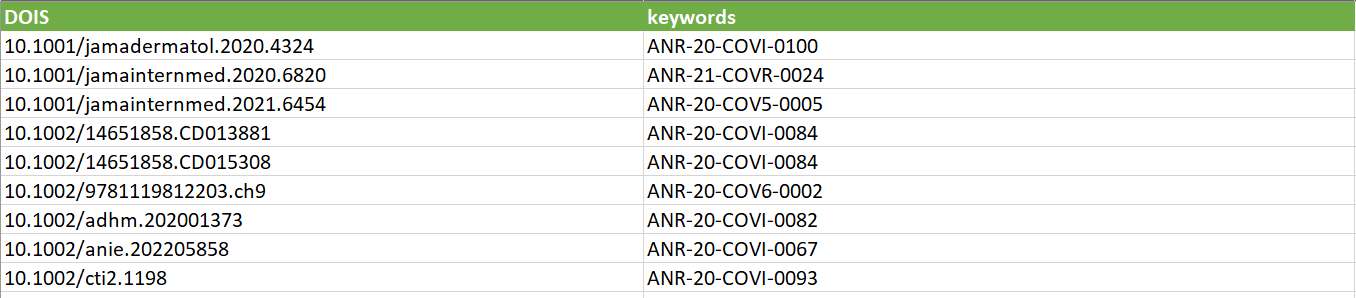

### Etape optionnelle : Ce morceau de code va nettoyer les espaces superflus avant les caractères spécifiques "," ";" ou non dans le cas où ce travail n'est pas fait dans Excel.
<img src="https://i.gifer.com/origin/b5/b5103832dc9de6bda3fb83613009c273_w200.gif"  width="15%" height="10%">


In [ ]:

# Ouvrez le fichier Excel (insérer le chemin du fichier entre les parenthèses)
workbook = openpyxl.load_workbook('chemin du fichier à traiter.xlsx')

# Parcourez chaque cellule des feuilles de calcul du fichier traité
for worksheet in workbook.worksheets:
    for row in worksheet.rows:
        for cell in row:
            if cell.value:
                cell.value = cell.value.replace('  ', ' ')
                cell.value = cell.value.replace(' ','')
                cell.value = cell.value.strip()
                cell.value = cell.value.replace(', ', ',')
                cell.value = cell.value.replace(' ,', ',')
                cell.value = cell.value.replace('; ', ';')
                cell.value = cell.value.replace(' ;', ';')

# Enregistrez le fichier Excel modifié, si le fichier excel n'existe pas il sera crée automatiquement sous le format spécifié (.csv,.xlsx)
workbook.save('chemin du fichier excel traité.xlsx')


## Correction des codes décisions dans le cas où le fichier Excel comportent des erreurs sur les codes

Il est possible que dans un fichier excel, les codes soient mal agencés où comportent un grand nombre d'erreurs pouvant induire des erreurs lors du filtrage. Par exemple :
* Des codes décisions peuvent être collés et pas séparés par des ";"
* Des codes décisions peuvent manquer le "ANR-" au début
* Certains peuvent présenter "--" au lieu de "-"
* Des caractères superflues ou en trop peuvent être présent


La cellule suivante va utiliser les expressions régulières afin de mettre dans la bonne nomenclature les codes décisions "mal écrit" ainsi que corriger le fichier comportant les codes.

**ATTENTION** CE CODE N'EST PAS UN FILTRE

In [ ]:
# lire le fichier excel
xlsx = pd.read_excel('doi_à_ajouter_wos_nospace.xlsx',sheet_name=None)

# boucler sur toutes les feuilles
for sheet_name, df in xlsx.items():
    # enlever les caractères spécifiques des codes
    df['codes'] = df['codes'].str.replace('[','').str.replace(']','').str.replace("'",'').str.replace('"','').str.replace('(','').str.replace(')','')

    # remplacer les "," par des ";" 
    df['codes'] = df['codes'].str.replace(',',';').str.replace(';;',';')

    # remplacer les "--" et "_" par "-" 
    df['codes'] = df['codes'].str.replace('--', '-').str.replace('_', '-')


    # Ajouter un "-" après "ANR" pour les codes qui n'en ont pas
    df['codes'] = df['codes'].str.replace('ANR1', 'ANR-1')

    # Ajouter "ANR-" au début des codes qui correspondent à l'expression régulière spécifiée
    df['codes'] = df['codes'].apply(lambda x: ';'.join(['ANR-' + i if re.match(r'\d{2}-(?:CE\d{2}|ACVT|AIBB|AIRT|AUTO|BINF|BTBR|CAMP|CARN|CMAQ|CMAS|COHO|CONV|CRNT|DMAV|DMES|DPBS|DUNE|EQPX|ESRE|EURE|EXES|F2II|FRAN|FRMI|FTAP|GDFF|GURE|IAHU|IBHU|IDES|IDEX|IDFI|IDFN|IEEC|IEED|INBS|LABX|MAFM|MPGA|NANB|NCUN|NUDD|NUWA|P3IA|PAMR|PAST|PAVH|PCPA|PECY|PEHY|PETQ|PEXD|PEXM|PHUC|PLEG|PMRB|PNCQ|POCE|QMET|RHUS|RSNR|SACL|SATE|SATM|SATT|SFRI|STHP)-\d{4}', i) else i for i in x.split(';')]))

    #C'est ici que la magie s'opère et que les regex vont corriger les codes décisions mal écrit (pour minimiser les erreurs ont ne va pas faire une application sur CE et PIA mais tous les code scorrespondant à la nomenclature ANR-**-CE/PIA-****)
    df['codes'] = df['codes'].apply(lambda x: re.sub(r'ANR(\d{2})(\w{4})(\d{4})',r'ANR-\1-\2-\3',x))
    df['codes'] = df['codes'].apply(lambda x: re.sub(r'ANR-(\d{2})(\w{4})(\d{4})',r'ANR-\1-\2-\3',x))
    df['codes'] = df['codes'].apply(lambda x: re.sub(r'ANR-(\d{2})-(\w{4})(\d{4})',r'ANR-\1-\2-\3',x))
    df['codes'] = df['codes'].apply(lambda x: re.sub(r'ANR(\d{2})-(\w{4})(\d{4})',r'ANR-\1-\2-\3',x))
    df['codes'] = df['codes'].apply(lambda x: re.sub(r'ANR-(\d{2})(\w{4})-(\d{4})',r'ANR-\1-\2-\3',x))
    df['codes'] = df['codes'].apply(lambda x: re.sub(r'ANR(\d{2})(\w{4})-(\d{4})',r'ANR-\1-\2-\3',x))
    df['codes'] = df['codes'].apply(lambda x: re.sub(r'ANR(\d{2})-(\w{4})-(\d{4})',r'ANR-\1-\2-\3',x))

    df['codes'] = df['codes'].apply(lambda x: re.sub(r'ANR-(\d{2})-(\w{4})-(\d{4})-(\w{1,20})',r'ANR-\1-\2-\3',x))
    df['codes'] = df['codes'].apply(lambda x: re.sub(r'ANR-(\d{2})-(\w{4})-(\d{4})(\w{1,20}?-(\w{1,20}))',r'ANR-\1-\2-\3',x))
    df['codes'] = df['codes'].apply(lambda x: re.sub(r'ANR-(\d{2})-(\w{4})-(\d{4})-(\w*)',r'ANR-\1-\2-\3',x))
    df['codes'] = df['codes'].apply(lambda x: re.sub(r'ANR-(\d{2})-(\w{4})-(\d{4})\w{1,20}',r'ANR-\1-\2-\3',x))

    df['codes'] = df['codes'].apply(lambda x: re.sub(r'ANR-(\d{2})-(\w{1,3})-(\d{4})-\w{1,9}',r'ANR-\1-\2-\3',x))
    df['codes'] = df['codes'].apply(lambda x: re.sub(r'ANR-(\d{2})-(\w{4})-(\d{4})-\w{1,20}',r'ANR-\1-\2-\3',x))
    df['codes'] = df['codes'].apply(lambda x: re.sub(r'ANR-(\d{2})-(\w{5,9})-(\d{4})-\w{1,20}',r'ANR-\1-\2-\3',x))

    df['codes'] = df['codes'].apply(lambda x: re.sub(r'(\w{1,20})ANR-(\d{2})-(\w{4})-(\d{4})',r'ANR-\1-\2-\3',x))
    df['codes'] = df['codes'].apply(lambda x: re.sub(r'(\w{1,20})-ANR-(\d{2})-(\w{4})-(\d{4})',r'ANR-\1-\2-\3',x))
    df['codes'] = df['codes'].apply(lambda x: re.sub(r'ANR-(\d{2})-(\w{1,9})-(\d{4})-\w{1,9}',r'ANR-\1-\2-\3',x))

    df['codes'] = df['codes'].apply(lambda x: re.sub(r'ANR-(\d{2})-(\w{4})-((\w{2})-(\w{2}))',r'ANR-\1-\2-\4\5',x))

# enregistrer le fichier modifié
writer = pd.ExcelWriter('nom du fichier à enregistrer.xlsx')
for sheet_name, df in xlsx.items():
    df.to_excel(writer, sheet_name=sheet_name, index=False)
writer.save()


## Filtrage des codes décisions (ETAPE IMPORTANTE)

Ce morceau de code est le plus important car celui ci va lire le fichier Excel et filtrer sur toutes les feuilles du fichier les bons codes AAPG et PIA au dessus de ANR-15 des mauvais codes grâce à une expression régulière `ANR-(?:1[6-9]|[2-9][0-9])-(?:CE\d{2}|ACVT|AIBB|AIRT|AUTO|BINF|BTBR|CAMP|CARN|CMAQ|CMAS|COHO|CONV|CRNT|DMAV|DMES|DPBS|DUNE|EQPX|ESRE|EURE|EXES|F2II|FRAN|FRMI|FTAP|GDFF|GURE|IAHU|IBHU|IDES|IDEX|IDFI|IDFN|IEEC|IEED|INBS|LABX|MAFM|MPGA|NANB|NCUN|NUDD|NUWA|P3IA|PAMR|PAST|PAVH|PCPA|PECY|PEHY|PETQ|PEXD|PEXM|PHUC|PLEG|PMRB|PNCQ|POCE|QMET|RHUS|RSNR|SACL|SATE|SATM|SATT|SFRI|STHP)-\w{4}`. 

<img src="https://media.tenor.com/y2JXkY1pXkwAAAAC/cat-computer.gif"  width="20%" height="20%">

In [23]:
# Charger le fichier Excel existant en utilisant pandas, l'option sheet_name = None va permettre de boucler le travail sur toutes les feuilles du fichier excel
df = pd.read_excel((r"C:\Users\baccam\Documents\Exports bibtex BSO nouvelle biblio\Travail Juliette\Mars_2023\portail.xlsx"), sheet_name=None)

# Créer une nouvelle colonne pour les codes filtrés
for sheet_name, sheet_df in df.items():
    sheet_df["codes AAPG et PIA bon"] = sheet_df["keywords"].apply(lambda x: ";".join(re.findall("ANR-(?:1[6-9]|[2-9][0-9])-(?:CE\d{2}|ACVT|AIBB|AIRT|AUTO|BINF|BTBR|CAMP|CARN|CMAQ|CMAS|COHO|CONV|CRNT|DMAV|DMES|DPBS|DUNE|EQPX|ESRE|EURE|EXES|F2II|FRAN|FRMI|FTAP|GDFF|GURE|IAHU|IBHU|IDES|IDEX|IDFI|IDFN|IEEC|IEED|INBS|LABX|MAFM|MPGA|NANB|NCUN|NUDD|NUWA|P3IA|PAMR|PAST|PAVH|PCPA|PECY|PEHY|PETQ|PEXD|PEXM|PHUC|PLEG|PMRB|PNCQ|POCE|QMET|RHUS|RSNR|SACL|SATE|SATM|SATT|SFRI|STHP)-\w{4}", x)))
    # Remplacer les codes filtrés dans la colonne "codes" par des chaînes vides
    sheet_df["mauvais codes"] = sheet_df["keywords"].apply(lambda x: re.sub("ANR-(?:1[6-9]|[2-9][0-9])-(?:CE\d{2}|ACVT|AIBB|AIRT|AUTO|BINF|BTBR|CAMP|CARN|CMAQ|CMAS|COHO|CONV|CRNT|DMAV|DMES|DPBS|DUNE|EQPX|ESRE|EURE|EXES|F2II|FRAN|FRMI|FTAP|GDFF|GURE|IAHU|IBHU|IDES|IDEX|IDFI|IDFN|IEEC|IEED|INBS|LABX|MAFM|MPGA|NANB|NCUN|NUDD|NUWA|P3IA|PAMR|PAST|PAVH|PCPA|PECY|PEHY|PETQ|PEXD|PEXM|PHUC|PLEG|PMRB|PNCQ|POCE|QMET|RHUS|RSNR|SACL|SATE|SATM|SATT|SFRI|STHP)-\w{4}", "", x))

# Enregistrer les bons codes AAPG et PIA > ANR-16 dans un nouveau fichier Excel avec la colonne "doi"
with pd.ExcelWriter('C:\\Users\\baccam\\Documents\\Exports bibtex BSO nouvelle biblio\\Travail Juliette\\Mars_2023\\export portail bon mars 2023.xlsx') as writer:
    for sheet_name, sheet_df in df.items():
        sheet_df.to_excel(writer, sheet_name=sheet_name, columns=["DOI","codes AAPG et PIA bon"], index=False)

# Enregistrer les mauvais codes dans un autre fichier Excel avec la colonne "doi"
with pd.ExcelWriter('C:\\Users\\baccam\\Documents\\Exports bibtex BSO nouvelle biblio\\Travail Juliette\\Mars_2023\\export portail_mauvais mars 2023.xlsx') as writer:
    for sheet_name, sheet_df in df.items():
        sheet_df.to_excel(writer, sheet_name=sheet_name, columns=["DOI","mauvais codes"], index=False)


On a donc deux fichiers d'après le code précédent :
* Un fichier comprend tout les bons codes AAPG et PIA au dessus de ANR-16
* Un fichier avec tout les mauvais codes pour contrôle

Toutefois les deux codes possèdent des lignes vides car on a seulement séparer les deux types de bons et mauvais codes. On ne les a pas supprimés.

La prochaine étape est encore optionnelle mais permet de  séparer les cellules vides des cellules pleines dans deux fichiers distincts (cette étape est optionnelle car les lignes vides peuvent être supprimées manuellement par Excel). On peut aussi modifier ce code pour tout simplement supprimer les cellules vides

In [24]:
# Lire le fichier excel comprenant tout les bons codes mais avec des cellules vides dans la liste des codes décisionnels
xls = pd.read_excel('C:\\Users\\baccam\\Documents\\Exports bibtex BSO nouvelle biblio\\Travail Juliette\\Mars_2023\\export portail bon mars 2023.xlsx', sheet_name=None)

#Création de dictionnaires vites pour enregistrer les données contenant des codes et les cellules vides
df_non_vide = {}
df_vide = {}

# Créer une boucle pour chaque feuille 
for sheet_name, df in xls.items():
    # Séparer les lignes avec des codes non vides et vides
    df_non_vide[sheet_name] = df[df['codes AAPG et PIA bon'].notna()]
    df_vide[sheet_name] = df[df['codes AAPG et PIA bon'].isna()]
    df_vide[sheet_name].rename(columns={'DOI': 'DOIS sans codes ANR', 'codes AAPG et PIA bon': 'codes'}, inplace=True)

# Enregistrer les deux dataframes séparés dans des fichiers Excel distincts
#Il est possible de mettre le même chemin que le fichier d'origine pour ne pas créer un autre fichier excel mais cela écrasera le fichier d'origine.
with pd.ExcelWriter('C:\\Users\\baccam\\Documents\\Exports bibtex BSO nouvelle biblio\\Travail Juliette\\Mars_2023\\export portail bon avec code mars 2023.xlsx') as writer:
    for sheet_name, df in df_non_vide.items():
        df.to_excel(writer, sheet_name=sheet_name, index=False)

#il n'est pas obligatoire d'enregistrer ce dataframe contenant tout les DOIs avec un mauvais codes, pour cela il suffit d'ajouter un # avant le code.
with pd.ExcelWriter('C:\\Users\\baccam\\Documents\\Exports bibtex BSO nouvelle biblio\\Travail Juliette\\Mars_2023\\export portail bon sans code mars2023.xlsx') as writer:
    for sheet_name, df in df_vide.items():
        df.to_excel(writer, sheet_name=sheet_name, index=False)


C:\Users\baccam\AppData\Local\Temp\ipykernel_14060\740607339.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vide[sheet_name].rename(columns={'DOI': 'DOIS sans codes ANR', 'codes AAPG et PIA bon': 'codes'}, inplace=True)
C:\Users\baccam\AppData\Local\Temp\ipykernel_14060\740607339.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vide[sheet_name].rename(columns={'DOI': 'DOIS sans codes ANR', 'codes AAPG et PIA bon': 'codes'}, inplace=True)
C:\Users\baccam\AppData\Local\Temp\ipykernel_14060\740607339.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the 

### Création de deux colonnes AAPG et PIA

Maintenant que l'on a un fichier propre de DOIs et codes décisions AAPG et/ou PIA au dessus de ANR-16, on va créer deux colonnes qui vont nous indiquer si les DOIs sont AAPG et/ou PIA. 

<img src="https://i.kym-cdn.com/entries/icons/original/000/034/772/Untitled-1.png"  width="20%" height="20%">

In [25]:
# chargement du fichier Excel propre contenant la liste de DOIs avec codes décisions sans cellules vides et où on veut ajouter les colonnes
dfs = pd.read_excel((r"C:\Users\baccam\Documents\Présentation CDS\codes decisions biblio 10_03.xlsx"), sheet_name=None)

# liste des caractères à vérifier
caracteres_a_verifier = ['ACVT', 'AIBB', 'AIRT', 'AUTO', 'BINF', 'BTBR', 'CAMP', 'CARN', 'CMAQ', 'CMAS', 'COHO', 'CONV', 'CRNT', 'DMAV', 'DMES', 'DPBS', 'DUNE', 'EQPX', 'ESRE', 'EURE', 'EXES', 'F2II', 'FRAN', 'FRMI', 'FTAP', 'GDFF', 'GURE', 'IAHU', 'IBHU', 'IDES', 'IDEX', 'IDFI', 'IDFN', 'IEEC', 'IEED', 'INBS', 'LABX', 'MAFM', 'MPGA', 'NANB', 'NCUN', 'NUDD', 'NUWA', 'P3IA', 'PAMR', 'PAST', 'PAVH', 'PCPA', 'PECY', 'PEHY', 'PETQ', 'PEXD', 'PEXM', 'PHUC', 'PLEG', 'PMRB', 'PNCQ', 'POCE', 'QMET', 'RHUS', 'RSNR', 'SACL', 'SATE', 'SATM', 'SATT', 'SFRI', 'STHP']

# Boucle sur toutes les feuilles du fichier Excel
for sheet_name, df in dfs.items():
    # ajout des colonnes "AAPG" et "DGPIE" au dataframe, avec des valeurs par défaut de "non"
    df['AAPG'] = "non"
    df['DGPIE'] = "non"
    # itération sur chaque ligne du dataframe (c'est comme une formule mathématiques en gros)
    for index, row in df.iterrows():
        # Récupération de la valeur du code
        code = row['Manual Tags']
        # Vérification si le code décision contient "CE"
        if "CE" in code:
        # si oui, mettre "oui" dans la colonne "AAPG" et "non" dans la colonne "DGPIE"
            df.at[index, 'AAPG'] = "oui"
        else:
            df.at[index, 'AAPG'] = "non"
        # sinon, vérification si le code contient un des caractères à vérifier
        if any(char in code for char in caracteres_a_verifier):
        # si oui, mettre "non" dans la colonne "AAPG" et "oui" dans la colonne "DGPIE"
            df.at[index, 'DGPIE'] = "oui"
        else:
            df.at[index, 'DGPIE'] = "non"

# enregistrement du fichier Excel modifié
with pd.ExcelWriter((r"C:\Users\baccam\Documents\Présentation CDS\codes decisions biblio 10_03 avec colonnnes.xlsx")) as writer:
    for sheet_name in dfs.keys():
        dfs[sheet_name].to_excel(writer, sheet_name=sheet_name, index=False)


# Les codes suivants sont des outils pour traiter les fichiers excels en cas de doublons, caractères mal écrits ...

Ces codes sont trés utiles mais pas inclus dans la démarche au dessus car ce sont des traitement ponctuelles de ces fichiers.

## Lire la liste de DOIs du fichier excel et nettoyer les cellules contenant + de 1 DOI pour ne conserver que le premier DOI ✅

In [ ]:
import pandas as pd

# Charger le fichier Excel en utilisant pandas
df = pd.read_excel("C:\\Users\\baccam\\Documents\\Exports bibtex BSO nouvelle biblio\\new_bibliothèque_05102022\\test_nettoyage _dois_cellules\\test.xlsx")

# Boucle sur chaque ligne du DataFrame
for index, row in df.iterrows():
    # Récupérer la colonne DOI et la colonne de mots-clés
    doi = row["DOI"]
    keywords = row["keywords"]
    
    # Si la colonne DOI contient plusieurs DOIs, ne conserver que le premier
    if ";" in doi:
        doi = doi.split(";")[0]
    
    # Afficher le DOI et les mots-clés
    print("DOI:", doi)
    print("keywords:", keywords)

## Mettre tous les dois en minuscules et fusionner les codes décisonnels des mêmes DOIs d'un même fichier excel ✅

In [ ]:
import openpyxl
import pandas as pd

# Lecture du fichier Excel en tant que DataFrame
df = pd.read_excel("C:\\Users\\baccam\\Documents\\Exports bibtex BSO nouvelle biblio\\new_bibliothèque_05102022\\Export WOS Janvier 2023\\EJG à envoyer 27000 et 8000\\janvier2023_EJG_WOS.xlsx")

# Mettre en minuscules toutes les lettres dans la colonne des DOIs
df['DOIS'] = df['DOIS'].str.lower()

# Fusionner les mots-clés en utilisant la colonne des DOIs comme clé
merged_df = df.groupby('DOIS')['keywords'].apply(';'.join).reset_index()

# Enregistrement des modifications dans le classeur Excel
merged_df.to_excel("C:\\Users\\baccam\\Documents\\Exports bibtex BSO nouvelle biblio\\new_bibliothèque_05102022\\Export WOS Janvier 2023\\EJG à envoyer 27000 et 8000\\janvier2023_EJG_WOS.xlsx", index=False)


### nettoie les doublons d'une même cellule

In [ ]:
import pandas as pd

# Lire le fichier Excel en utilisant pandas
df = pd.read_excel("C:\\Users\\baccam\\Documents\\Exports bibtex BSO nouvelle biblio\\new_bibliothèque_05102022\\Export WOS Janvier 2023\\EJG à envoyer 27000 et 8000\\janvier2023_EJG_WOS.xlsx")

# Appliquer la fonction de fusion de mots clés à la colonne de mots clés
df['keywords'] = df['keywords'].apply(lambda x: ';'.join(set(x.split(';'))))

# Enregistrer le fichier Excel modifié
df.to_excel("C:\\Users\\baccam\\Documents\\Exports bibtex BSO nouvelle biblio\\new_bibliothèque_05102022\\Export WOS Janvier 2023\\EJG à envoyer 27000 et 8000\\janvier2023_EJG_WOS27000.xlsx", index=False)

## Comparer deux fichiers excels pour mettre les dois en minuscules et comparer les keywords pour les fusionner ✅

ATTENTION : LES DEUX FICHIERS EXCEL DOIVENT POSSEDER LE MÊME NOMBRE DE LIGNES

In [ ]:
import openpyxl
import pandas as pd

# Lecture des fichiers Excel en tant que DataFrames
df1 = pd.read_excel("C:\\Users\\baccam\\Documents\\Exports bibtex BSO nouvelle biblio\\new_bibliothèque_05102022\\Export WOS Janvier 2023\\EJG à envoyer 27000 et 8000\\Liste_dois_EJG_colonnes_modifié_27000.xlsx")
df2 = pd.read_excel("C:\\Users\\baccam\\Documents\\Exports bibtex BSO nouvelle biblio\\new_bibliothèque_05102022\\Export WOS Janvier 2023\\EJG à envoyer 27000 et 8000\\dois_avec_codes_ANR_filtrés.xlsx")

# Mettre en minuscules toutes les lettres dans la colonne des DOIs de chaque DataFrame
df1['DOIS'] = df1['DOIS'].str.lower()
df2['DOIS'] = df2['DOIS'].str.lower()

df3=pd.concat([df1,df2])
merged_df = pd.merge(df3,df2, on='DOIS',how='inner')

# Fusionner les DataFrames en utilisant la colonne des DOIs comme clé
#merged_df = pd.merge(df1, df2, on='DOIS')

# Fusionner les mots-clés en utilisant un séparateur ";" uniquement si les mots-clés sont différents
def merge_keywords(row):
    keywords_x = [keyword.strip() for keyword in row['keywords_x'].split(';')]
    keywords_y = [keyword.strip() for keyword in row['keywords_y'].split(';')]
    merged_keywords = []
    for keyword in keywords_x:
        if keyword not in merged_keywords:
            merged_keywords.append(keyword)
    for keyword in keywords_y:
        if keyword not in merged_keywords:
            merged_keywords.append(keyword)
    return ';'.join(merged_keywords)

merged_df['keywords'] = merged_df.apply(merge_keywords, axis=1)

# Enregistrement des modifications dans le premier classeur Excel
merged_df.to_excel("C:\\Users\\baccam\\Documents\\Exports bibtex BSO nouvelle biblio\\new_bibliothèque_05102022\\Export WOS Janvier 2023\\EJG à envoyer 27000 et 8000\\janvier2023_EJG_WOS.xlsx", index=False)

## Mettre des ; entre les codes décisionnels collées

In [ ]:
import openpyxl
import pandas as pd
import re # Ajout de l'import pour utiliser re.split

# Ouvrez le fichier Excel
sep_df = pd.read_excel('C:\\Users\\baccam\\Documents\\Exports bibtex BSO nouvelle biblio\\new_bibliothèque_05102022\\Nouveau_fichier_TOTAL_AAPG_PIA\\TOTAL_ZOTERO_AAPG_PIA_cleanspace.xlsx')


def transform_string(string):
  # Enlevez les espaces inutiles
  string = string.strip()
  # Remplacez les espaces multiples par un seul espace
  string = string.replace('  ', ' ')

  # Utilise une expression régulière pour séparer la chaîne de caractères en un tableau de codes
  codes = re.split(r'(ANR-\d{2}-(?:CE\d{2}|ACVT|AIBB|AIRT|AUTO|BINF|BTBR|CAMP|CARN|CMAQ|CMAS|COHO|CONV|CRNT|DMAV|DMES|DPBS|DUNE|EQPX|ESRE|EURE|EXES|F2II|FRAN|FRMI|FTAP|GDFF|GURE|IAHU|IBHU|IDES|IDEX|IDFI|IDFN|IEEC|IEED|INBS|LABX|MAFM|MPGA|NANB|NCUN|NUDD|NUWA|P3IA|PAMR|PAST|PAVH|PCPA|PECY|PEHY|PETQ|PEXD|PEXM|PHUC|PLEG|PMRB|PNCQ|POCE|QMET|RHUS|RSNR|SACL|SATE|SATM|SATT|SFRI|STHP)-\d{4})', string)
  # Filtre les éléments vides du tableau
  codes = [code for code in codes if code]
  # Rejoins les éléments du tableau en une chaîne de caractères séparée par ";" uniquement si le code n'est pas déjà suivi d'un ";"
  return ";".join([code for code in codes if not code.endswith(";")])

# Appliquer la fonction transform_string à chaque cellule de la colonne des mots-clés
sep_df['codes décisions'] = sep_df['codes décisions'].apply(transform_string)

# Enregistrement des modifications dans le classeur Excel
sep_df.to_excel('C:\\Users\\baccam\\Documents\\Exports bibtex BSO nouvelle biblio\\new_bibliothèque_05102022\\Nouveau_fichier_TOTAL_AAPG_PIA\\TOTAL_ZOTERO_AAPG_PIA_cleansemicolon.xlsx', index=False)

# Traitement des exports Zotero

Il est possible de faire des exports CSV depuis Zotero de bibliothèque personnelle et de groupe. Toutefois pour certains types de document, les DOIs sont présents dans la colonne `Extra` et non la colonne ``DOIs``.
Il faut alors déplacer ces DOIs dans la bonne colonne. Lorsqu'un DOI est manquant dans une ligne le code en dessous va rechercher dans la colonne extra si un DOI n'est pas présent suivant une expressions régulière du type `10\.\d{4,}(\.\d+)*/(.+)$` et l'insérer dans la colonne DOI si cette dernière est vide

In [ ]:
import pandas as pd
import re

# Charger le fichier Excel de la bibliothèque Zotero en utilisant pandas
df = pd.read_excel("Bibliothèque34720zotero.xlsx")

# Convertir toutes les valeurs de la colonne "Extra" en chaînes de caractères
df["Extra"] = df["Extra"].astype(str)

# Boucle pour parcourir chaque ligne du DataFrame
for index, row in df.iterrows():
    # Récupérer la valeur de la colonne "Extra"
    extra_value = row["Extra"]
    # Utilisez l'expression régulière pour trouver les valeurs de DOI dans la chaîne de caractères
    doi_match = re.search("10\.\d{4,}(\.\d+)*/(.+)$", extra_value)
    if doi_match and pd.isnull(row["DOI"]):
        # Récupérer la valeur de DOI trouvée
        doi_value = doi_match.group()
        # Mettre à jour la valeur de la colonne "DOI" pour cette ligne
        df.at[index, "DOI"] = doi_value

# Enregistrer les modifications dans un nouveau fichier Excel
df.to_excel("Bibliozotero34720ZOT.xlsx", index=False)

Maintenant que tout les DOIs ont été déplacés dans la bonne colonne : Il est possible de comparer s'il y a des doublons entre deux fichiers (dans notre cas la bibliothèque Zotero et un fichier d'export HAL)

In [ ]:
# Charger les deux fichiers Excel en utilisant Pandas
df1 = pd.read_excel("Bibliozotero34720ZOT.xlsx") #Insérer le chemin du fichier de la bibliothèque Zotero
df2 = pd.read_excel("C:\\Users\\baccam\\Documents\\Exports bibtex BSO nouvelle biblio\\new_bibliothèque_05102022\\Export WOS Janvier 2023\\Insertion biblio zotero 26012023\\DOICOVID\\DOI COVID à ajouter dans Zotero.xlsx") #Insérer le fichier de l'Export à comparer

# Récupérer les colonnes contenant les mots clés
doi1 = df1["DOIS"]
doi2 = df2["DOIS"]

# Trouver les doublons entre les deux listes de mots clés
duplicates = set(doi1).intersection(doi2)

# Afficher les doublons s'ils existent
if duplicates:
    print("Les doublons sont :", duplicates)
else:
    print("Il n'y a pas de doublons entre les deux fichiers.")

## Traitement sur les dossiers de rapports finaux pour comparer ceux déjà traités des autres

#### Identification des Codes décisions qui ne sont pas des doublons et les enregistrés dans un fichier "DOIs_uniques.xlsx"

In [5]:
import pandas as pd
import re

# Charger les deux fichiers Excel en utilisant Pandas
df1 = pd.read_excel((r"C:\Users\baccam\Documents\BSO version mars 2023\DOI_BSO_Mars.xlsx"))
df2 = pd.read_excel((r"C:\Users\baccam\Downloads\DOI_PIA+AAPG_03022023.xlsx"))

# Récupérer les colonnes contenant les mots clés
code1 = df1["DOIS"]
code2 = df2["DOIS"]

# Trouver les codes qui ne sont pas des doublons
unique_code = set(code1).difference(code2)

# Afficher les codes qui ne sont pas des doublons
if unique_code:
    print("Les codes qui ne sont pas des doublons sont :", unique_code)
else:
    print("Il n'y a pas de codes qui ne sont pas des doublons entre les deux fichiers.")

# Créer un nouveau DataFrame avec les codes uniques
df_unique = pd.DataFrame(list(unique_code), columns=["DOIS"])

# Créer un nouveau DataFrame avec les DOIs qui ne sont pas uniques
df_not_unique = df1[~df1["DOIS"].isin(unique_code)]

# Enregistrer le DataFrame dans un fichier Excel
df_unique.to_excel("C:\\Users\\baccam\\Documents\\BSO version mars 2023\\codes_uniques_aapg2018_bis.xlsx", index=False)
df_not_unique.to_excel("C:\\Users\\baccam\\Documents\\BSO version mars 2023\\codes_non_uniques_aapg2018_bis.xlsx", index=False)

# Afficher un message de confirmation
print("Les codes uniques ont été enregistrés dans le fichier codes_uniques_aapg2018.xlsx et codes_non_uniques_aapg2018.xlsx.")

c:\Users\baccam\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


Il n'y a pas de codes qui ne sont pas des doublons entre les deux fichiers.
Les codes uniques ont été enregistrés dans le fichier codes_uniques_aapg2018.xlsx et codes_non_uniques_aapg2018.xlsx.


### Comparer deux fichiers excels pour obtenir un troisième fichier avec un code couleur

In [10]:
import pandas as pd

# Lire les deux fichiers Excel dans des dataframes
df1 = pd.read_excel((r"C:\Users\baccam\Documents\BSO version mars 2023\DOI_BSO_Mars.xlsx"))#fichier1
df2 = pd.read_excel((r"C:\Users\baccam\Downloads\DOI_PIA+AAPG_03022023.xlsx"))#fichier2

# Fusionner les deux dataframes en utilisant les DOIs comme clé de jointure
merged_df = pd.merge(df1, df2, on='DOIS', how='outer', indicator=True)

# Ajouter une colonne pour indiquer la provenance de chaque DOI
merged_df.loc[merged_df['_merge'] == 'left_only', 'Provenance'] = 'Fichier 1'
merged_df.loc[merged_df['_merge'] == 'right_only', 'Provenance'] = 'Fichier 2'
merged_df.loc[merged_df['_merge'] == 'both', 'Provenance'] = 'Les deux fichiers'

# Colorer les DOIs en fonction de leur provenance
def color_provenance(val):
    if val == 'Les deux fichiers':
        return 'background-color: red'
    elif val == 'Fichier 1':
        return 'background-color: blue'
    elif val == 'Fichier 2':
        return 'background-color: green'
    else:
        return ''

styled_df = merged_df.style.applymap(color_provenance, subset=['Provenance'])

# Enregistrer le dataframe coloré dans un fichier Excel
styled_df.to_excel("C:\\Users\\baccam\\Documents\\BSO version mars 2023\\Comparaison_BSO.xlsx", index=False)


c:\Users\baccam\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)
